## 1. Importing Libraries

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Loading the MNIST Dataset

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. Checking the Shape of a Training Image

In [8]:
x_train[0].shape

(28, 28)

## 4. Inspecting a Specific Training Image

In [9]:
x_train[444]  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## 5. Checking the Label of a Training Image

In [10]:
y_train[444]

np.uint8(2)

## 6. Visualizing a Training Image

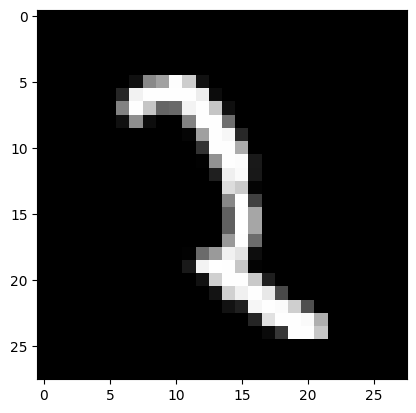

In [11]:
plt.imshow(x_train[444], cmap="Greys_r")

## 7. Checking the Shape of Training and Test Sets

In [12]:
print(x_train.shape, "train samples")
print(x_test.shape, "test samples")

(60000, 28, 28) train samples
(10000, 28, 28) test samples


## 8. Preprocessing the Data

In [13]:

x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255


## 9. Converting Labels to Categorical Format

In [14]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[
    333
]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

## 10. Defining the First Neural Network Model (model_1)

In [ ]:

model_1 = Sequential()
model_1.add(Dense(64, activation="relu", input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation="softmax"))

In [16]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:

learning_rate = 0.001
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)


In [18]:
batch_size = 128 
epochs = 30
history = model_1.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7474 - loss: 0.8261 - val_accuracy: 0.9392 - val_loss: 0.2047
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.2579 - val_accuracy: 0.9527 - val_loss: 0.1535
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9394 - loss: 0.2067 - val_accuracy: 0.9593 - val_loss: 0.1289
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.1741 - val_accuracy: 0.9638 - val_loss: 0.1177
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1530 - val_accuracy: 0.9682 - val_loss: 0.1063
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1443 - val_accuracy: 0.9657 - val_loss: 0.1080
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1372 - val_accuracy: 0.9699 - val_loss: 0.0982
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1266 - val_accuracy: 0.

In [19]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09945771843194962
Test accuracy: 0.9753999710083008


## 11. Plotting Loss and Accuracy

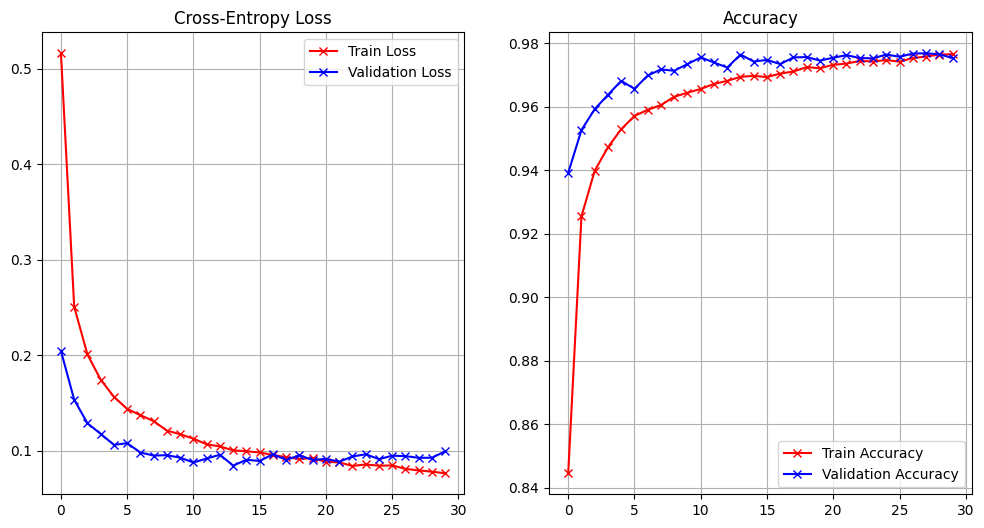

In [20]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], "r-x", label="Train Loss")
    ax.plot(history.history["val_loss"], "b-x", label="Validation Loss")
    ax.legend()
    ax.set_title("Cross-Entropy Loss")
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc], "r-x", label="Train Accuracy")
    ax.plot(history.history[val_acc], "b-x", label="Validation Accuracy")
    ax.legend()
    ax.set_title("Accuracy")
    ax.grid(True)


plot_loss_accuracy(history)

In [21]:
model_2 = Sequential()
model_2.add(Dense(400, activation="relu", input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation="relu"))
model_2.add(Dropout(0.4))


model_2.add(Dense(10, activation="softmax"))


learning_rate = 0.001
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)


batch_size = 128
epochs = 20

history = model_2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

model_2.summary()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8272 - loss: 0.5546 - val_accuracy: 0.9595 - val_loss: 0.1271
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9502 - loss: 0.1648 - val_accuracy: 0.9692 - val_loss: 0.1011
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9642 - loss: 0.1162 - val_accuracy: 0.9752 - val_loss: 0.0831
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9707 - loss: 0.0972 - val_accuracy: 0.9778 - val_loss: 0.0770
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9747 - loss: 0.0849 - val_accuracy: 0.9775 - val_loss: 0.0730
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9760 - loss: 0.0784 - val_accuracy: 0.9792 - val_loss: 0.0715
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9776 - loss: 0.0706 - val_accuracy: 0.9795 - val_loss: 0.0753
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.0634 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

In [22]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07110897451639175
Test accuracy: 0.9840999841690063


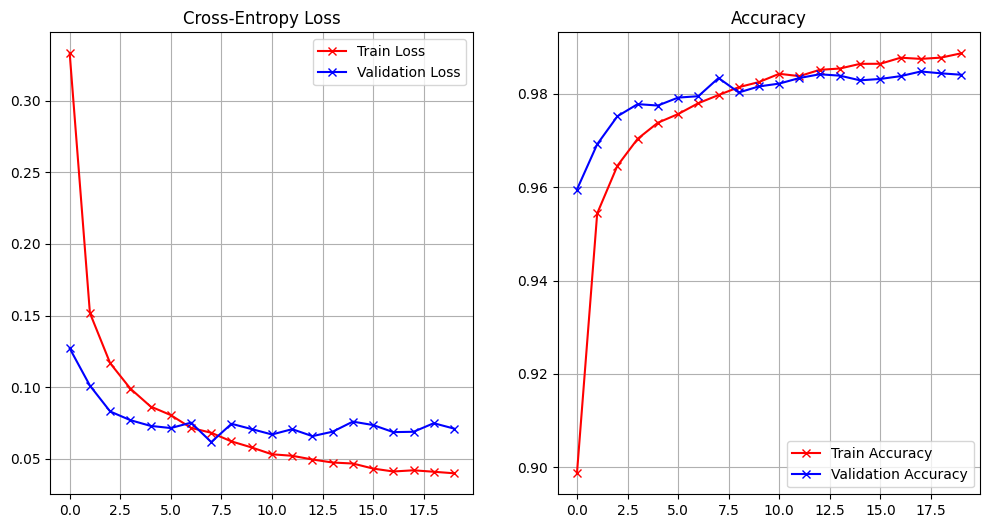

In [23]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], "r-x", label="Train Loss")
    ax.plot(history.history["val_loss"], "b-x", label="Validation Loss")
    ax.legend()
    ax.set_title("Cross-Entropy Loss")
    ax.grid(True) 
    ax = fig.add_subplot(1, 2, 2)
    
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc], "r-x", label="Train Accuracy")
    ax.plot(history.history[val_acc], "b-x", label="Validation Accuracy")
    ax.legend()
    ax.set_title("Accuracy")
    ax.grid(True)


plot_loss_accuracy(history)

## 12. Defining and Training the Second Neural Network Model (model_3)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7855 - loss: 0.7053 - val_accuracy: 0.9485 - val_loss: 0.1663
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9399 - loss: 0.1998 - val_accuracy: 0.9650 - val_loss: 0.1108
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9572 - loss: 0.1403 - val_accuracy: 0.9711 - val_loss: 0.0924
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9651 - loss: 0.1190 - val_accuracy: 0.9749 - val_loss: 0.0831
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9693 - loss: 0.0990 - val_accuracy: 0.9763 - val_loss: 0.0810
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9733 - loss: 0.0850 - val_accuracy: 0.9787 - val_loss: 0.0718
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9773 - loss: 0.0770 - val_accuracy: 0.9799 - val_loss: 0.0661
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.0686 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

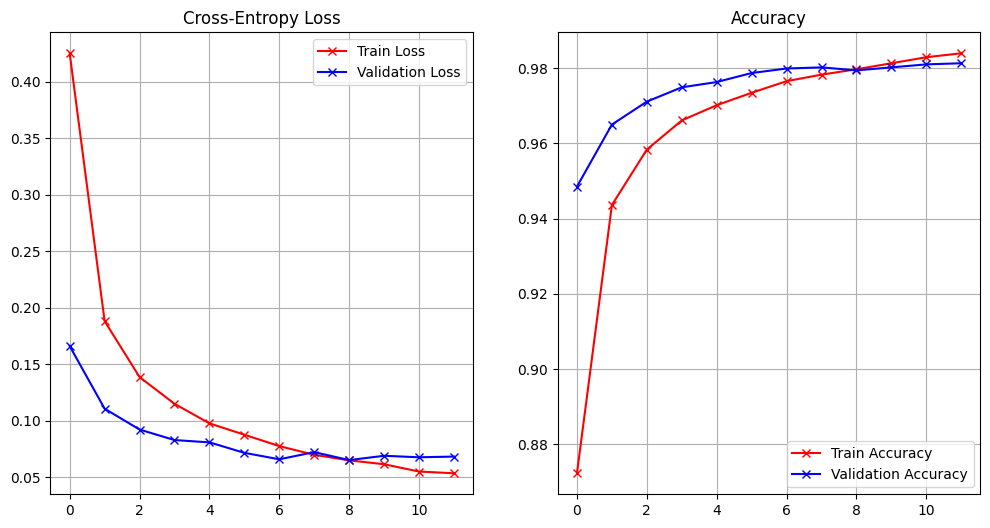

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
model_3 = Sequential()

model_3.add(Dense(400, activation="relu", input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(300, activation="relu"))
model_3.add(Dropout(0.4))

model_3.add(Dense(10, activation="softmax"))

learning_rate = 0.0005
model_3.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

batch_size = 128
epochs = 30

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model_3.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)


model_2.summary()
plot_loss_accuracy(history)

## 13. Evaluating the Model

In [25]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06537500023841858
Test accuracy: 0.9793999791145325
